##Importações de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kurtosis
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt,het_white
from statsmodels.stats.diagnostic import linear_harvey_collier, linear_reset, spec_white
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from yellowbrick.regressor import CooksDistance
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

##Leitura de dados

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Análise de dados

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
le = LabelEncoder()

#sex
le.fit(df.sex)
df.sex = le.transform(df.sex)

# smoker
le.fit(df.smoker)
df.smoker = le.transform(df.smoker)

#region
le.fit(df.region)
df.region = le.transform(df.region)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


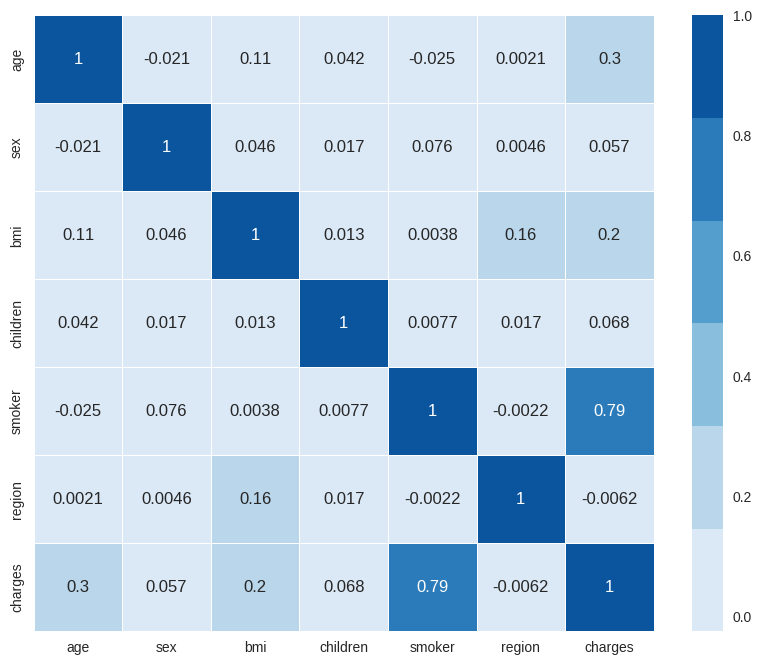

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

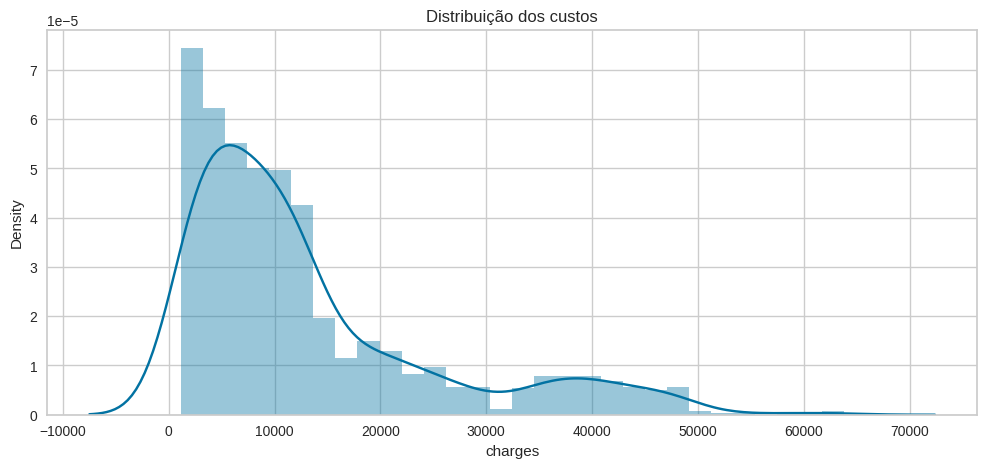

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribuição dos custos")
ax = sns.distplot(df["charges"], color = 'b')

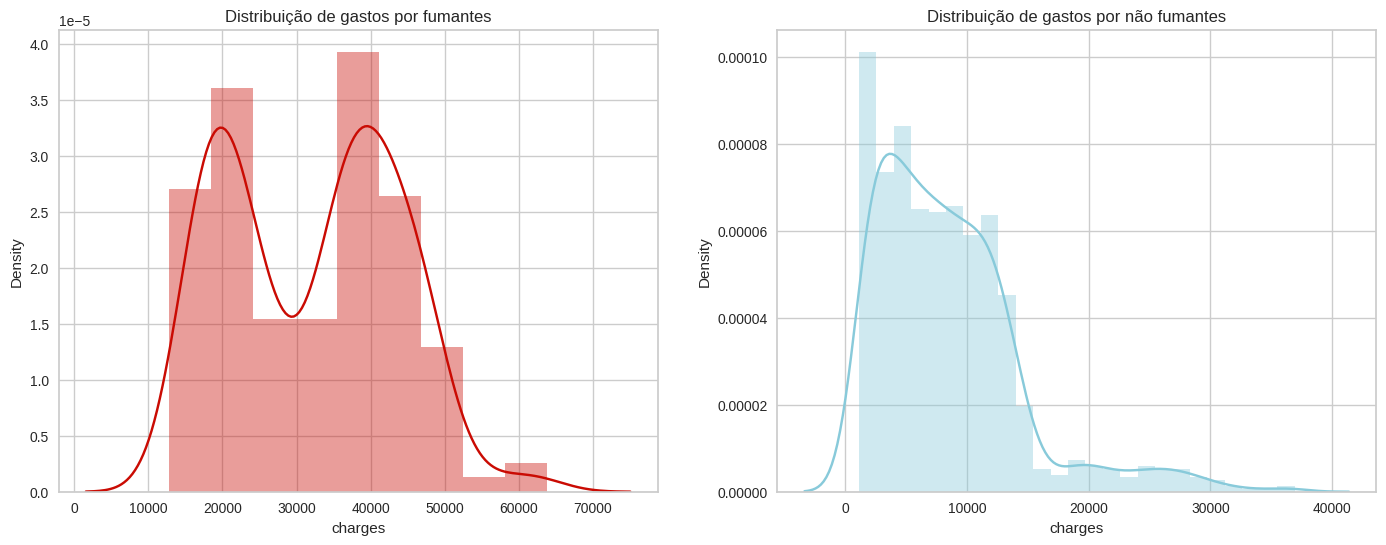

In [ ]:
fig= plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='r',ax=ax)
ax.set_title('Distribuição de gastos por fumantes');

ax=fig.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='c',ax=ax)
ax.set_title('Distribuição de gastos por não fumantes');

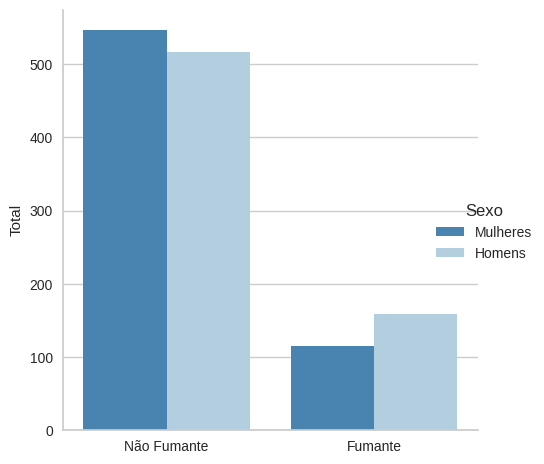

In [ ]:
g = sns.catplot(x="smoker", kind="count",hue = 'sex', palette="Blues_r", data=df,legend_out= True)

# Eixos
(g.set_axis_labels("", "Total")
  .set_xticklabels(["Não Fumante", "Fumante"])
  )

# Legenda
g._legend.set_title('Sexo')
new_labels = ['Mulheres', 'Homens']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

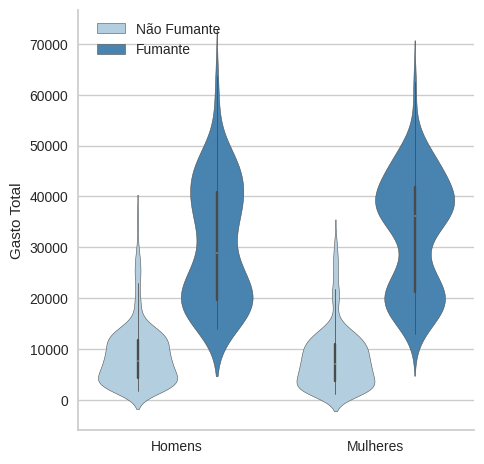

In [ ]:
#Distribuição de gastos por fumante e não fumante por sexo
g= sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'Blues', legend_out= False, ax=ax);

# Eixos
(g.set_axis_labels("", "Gasto Total")
  .set_xticklabels(["Homens", "Mulheres"])
  )

# Legenda
leg = g.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ["Não Fumante", "Fumante"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g._legend.set_bbox_to_anchor((.39,1))

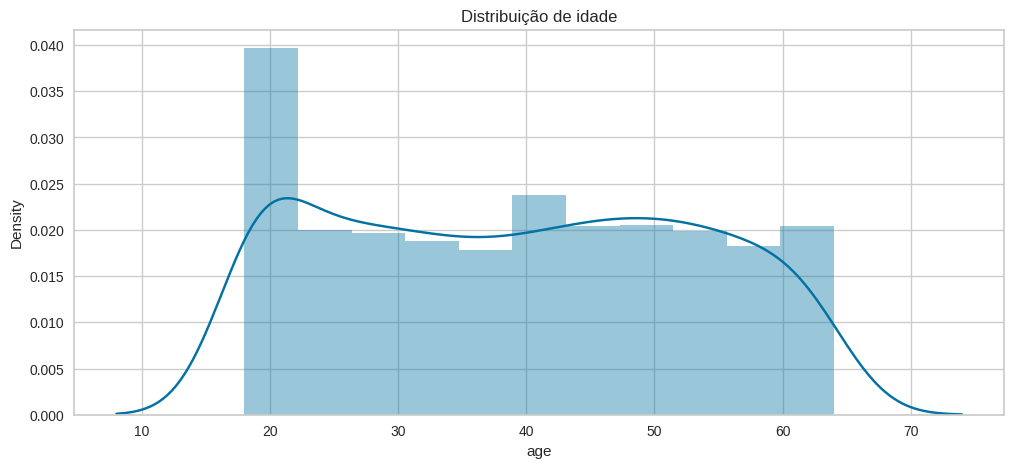

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de idade")
ax = sns.distplot(df["age"], color = 'b')

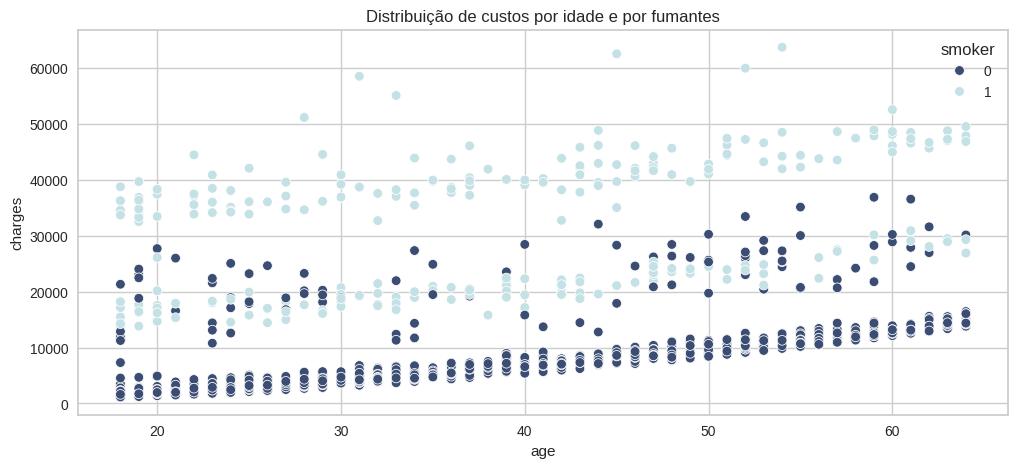

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos por idade e por fumantes")

#Distribuição de gastos por fumante e não fumante por sexo
sns.scatterplot(x=df.age,y=df.charges, hue= df.smoker, sizes=(12,5),  palette="ch:r=-.2,d=.3_r");

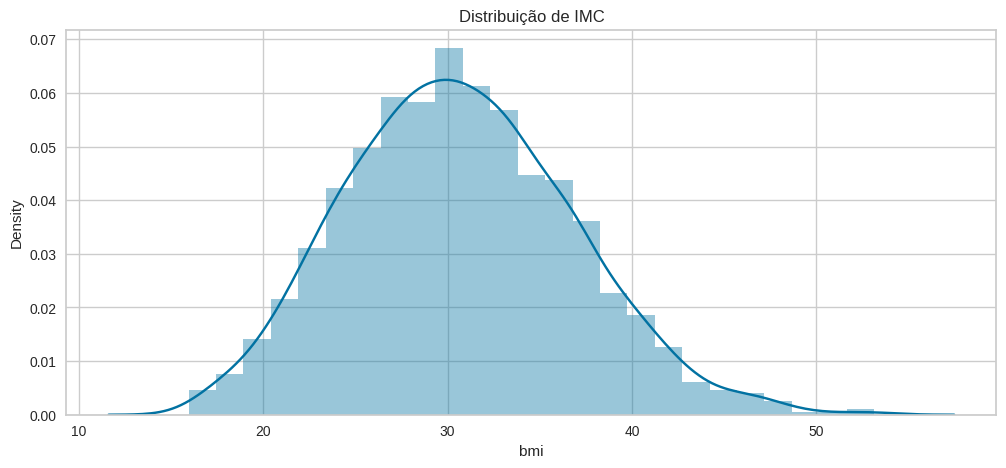

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de IMC")
ax = sns.distplot(df["bmi"], color = 'b')

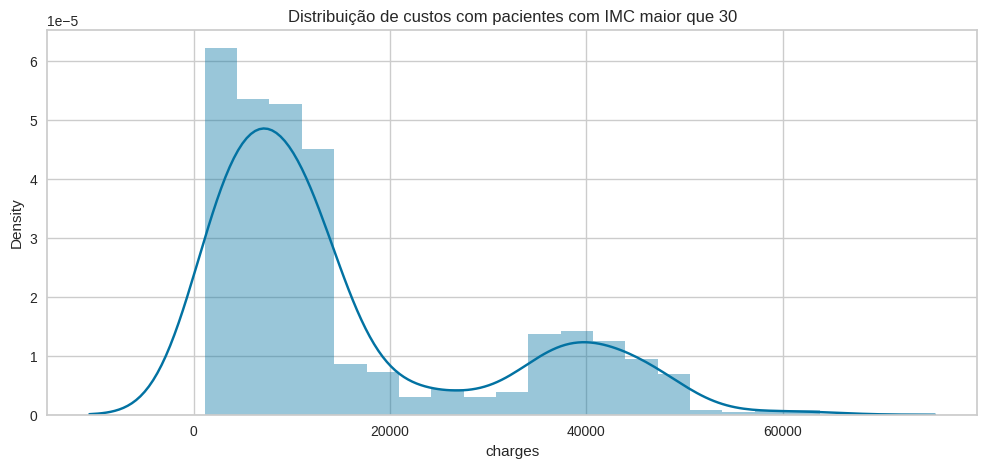

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos com pacientes com IMC maior que 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'b')

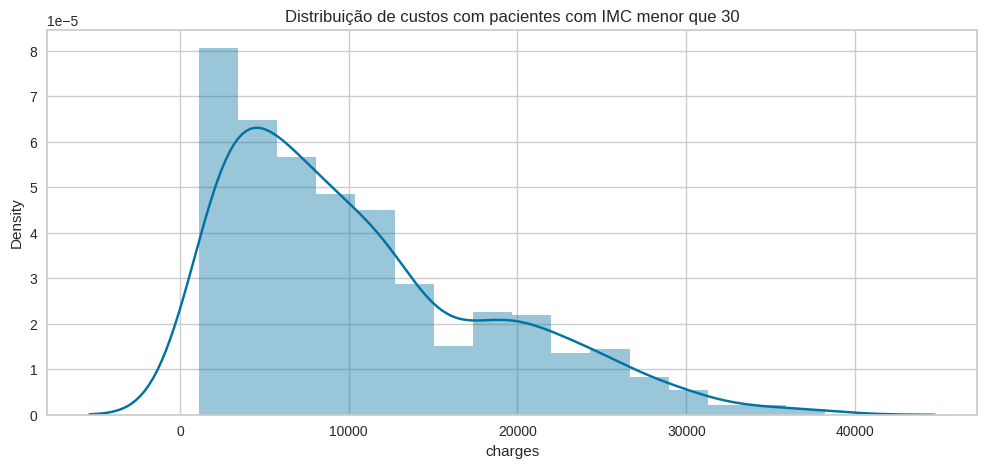

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos com pacientes com IMC menor que 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

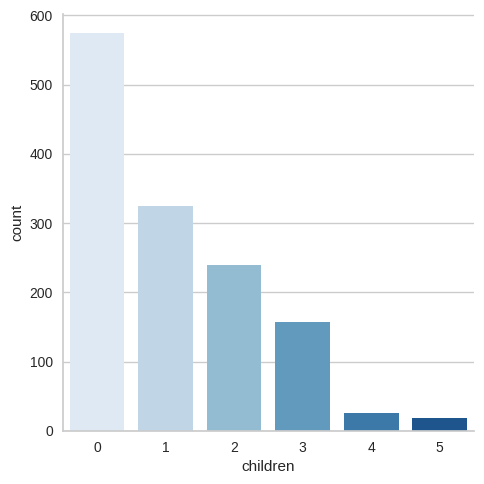

In [ ]:
sns.catplot(x="children", kind="count", palette="Blues", data=df);

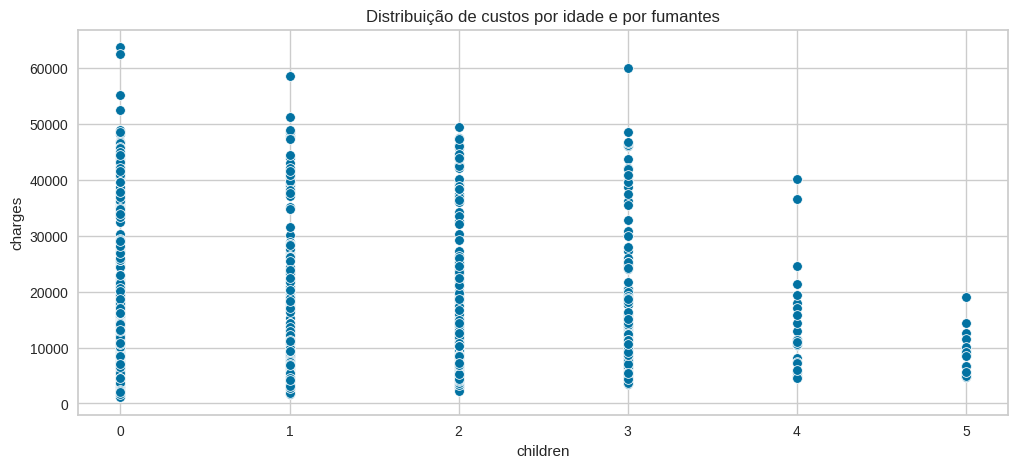

In [ ]:
#Distruição de Gastos por Fumantes e não fumantes
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos por idade e por fumantes")
#Distribuição de gastos por fumante e não fumante por sexo
sns.scatterplot(x=df.children,y=df.charges, sizes=(12,5),  palette="ch:r=-.2,d=.3_r");

##Algoritmo de Machine Learning

###Algoritmo de Regressão Linear

In [ ]:
#Separando os dados
x = df.drop(['charges'], axis = 1)
y = df.charges

#Separe os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treine o Modelo
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Calcule o score do modelo
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.7502083450869429


In [ ]:
print('Intercepto:', lr.intercept_)

Intercepto: -12135.589217416767


In [ ]:
coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,256.575018
sex,-378.969911
bmi,334.186592
children,544.172644
smoker,23988.639273
region,-147.223007


In [ ]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3852.385548276985
MSE: 33121649.67118159
RMSE: 5755.141151282181
